# Case 4. Кредитный скоринг

### Задача

Построить модель, которая будет предсказывать вероятность неплатежа клиента в следующем месяце.
Необходимо описать все выполняемые этапы построения, например, обработка данных, нормализация, отбор предикторов, оценка результатов построения, сравнение различных моделей и тд.

### Входные данные

Набор данных содержит информацию о дефолтных платежах, демографических факторах, кредитных данных, истории платежей и выписках по счетам клиентов по кредитным картам на Тайване с апреля 2005 г. по сентябрь 2005 г. Наименование файла с данными - UCI_Credit_Card.csv

### Описание переменных

Всего 25 переменных:
1.	ID : ID каждого клиента
2.	LIMIT_BAL : сумма предоставленного кредита в тайваньских долларах (включает индивидуальный и семейный / дополнительный кредит)
3.	SEX : Пол (1 = мужской, 2 = женский)
4.	EDUCATION: (1 = аспирантура, 2 = университет, 3 = средняя школа, 4 = другие, 5 = неизвестно, 6 = неизвестно)
5.	MARRIAGE: Семейное положение (1 = женат, 2 = холост, 3 = другие)
6.	AGE: Возраст в годах
7.	PAY_0 : Статус погашения в сентябре 2005 г. (-1 = своевременная оплата, 1 = задержка платежа на один месяц, 2 = задержка платежа на два месяца,… 8 = задержка платежа на восемь месяцев, 9 = задержка платежа на девять месяцев и более)
8.	PAY_2 : Статус погашения в августе 2005 г. (шкала такая же, как указано выше)
9.	PAY_3 : Статус погашения в июле 2005 г. (шкала такая же, как указано выше)
10.	PAY_4 : Статус погашения в июне 2005 г. (шкала такая же, как указано выше)
11.	PAY_5 : Статус погашения в мае 2005 г. (шкала такая же, как указано выше)
12.	PAY_6 : Статус погашения в апреле 2005 г. (шкала такая же, как указано выше)
13.	BILL_AMT1 : Сумма выписки по счету за сентябрь 2005 г. (NT-доллар)
14.	BILL_AMT2 : Сумма выписки по счету в августе 2005 г. (NT-доллар)
15.	BILL_AMT3 : Сумма выписки по счету за июль 2005 г. (NT-доллар)
16.	BILL_AMT4 : Сумма выписки по счету в июне 2005 г. (NT-доллар)
17.	BILL_AMT5 : Сумма выписки по счету в мае 2005 г. (NT-доллар)
18.	BILL_AMT6 : Сумма выписки по счету в апреле 2005 г. (NT-доллар)
19.	PAY_AMT1 : Сумма предыдущего платежа в сентябре 2005 г. (NT-доллар)
20.	PAY_AMT2 : Сумма предыдущего платежа в августе 2005 г. (NT-доллар)
21.	PAY_AMT3 : Сумма предыдущего платежа в июле 2005 г. (NT-доллар)
22.	PAY_AMT4 : Сумма предыдущего платежа в июне 2005 г. (NT-доллар)
23.	PAY_AMT5 : Сумма предыдущего платежа в мае 2005 г. (NT-доллар)
24.	PAY_AMT6 : Сумма предыдущего платежа в апреле 2005 г. (NT-доллар)
25.	default.payment.next.month : дефолт платежа в следующем месяце (1 = да, 0 = нет)

**Целевой признак:** бинарная переменная ```default.payment.next.month```.

### Методология исследования

1. **Изучить целевой признак, проверить его на дисбаланс.**
2. **Очистка данных:** удаление дубликатов, заполнение пропущенных значений, корректировка ошибок.
3. **Отбор предикторов:** выбор наиболее значимых признаков, которые будут использоваться для построения модели.
Создание обучающей и тестовой выборок: разделение данных на обучающую и тестовую выборки в соотношении, например, 80/20.
4. **Нормализация данных:** приведение всех признаков к одному масштабу, например, методом стандартизации или нормализации.
5. **Обучение модели:** выбор алгоритма машинного обучения и обучение модели на обучающей выборке.
6. **Оценка результатов:** оценка качества модели на тестовой выборке, например, с помощью метрик точности, полноты, F1-меры, ROC-кривой, AUC-ROC и т.д.
7. **Тюнинг параметров модели:** оптимизация параметров модели, например, методом перекрестной проверки или с помощью гиперпараметров.
8. **Сравнение различных моделей:** сравнение качества работы различных моделей на тестовой выборке и выбор наиболее подходящей модели.

In [123]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from tqdm import tqdm
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, mutual_info_regression


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import dill as pickle

from joblib import Parallel, delayed
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import fbeta_score, make_scorer, classification_report, roc_curve, confusion_matrix, roc_auc_score, accuracy_score, f1_score
from statsmodels.tools.tools import add_constant
%matplotlib inline

sns.set_style('whitegrid')
warnings.filterwarnings('ignore')
warnings.simplefilter("ignore", category=RuntimeWarning)
pd.options.mode.chained_assignment = None

## 1) Загрузка данных

In [2]:
d = pd.read_csv("C:\\Users\\HOME\\PycharmProjects\\case_studies_da\\4. UCI_Credit_Card\\UCI_Credit_Card.csv")
d.head(10)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
5,6,50000.0,1,1,2,37,0,0,0,0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0
6,7,500000.0,1,1,2,29,0,0,0,0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0
7,8,100000.0,2,2,2,23,0,-1,-1,0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0
8,9,140000.0,2,3,1,28,0,0,2,0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0
9,10,20000.0,1,3,2,35,-2,-2,-2,-2,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0


In [3]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [4]:
d.isna().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [29]:
d.columns[d.isnull().any()]

Index([], dtype='object')

In [30]:
# проверка на явные дубликаты
d.duplicated().sum()

0

In [31]:
pd.DataFrame(round(d.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
ID,0.000000
LIMIT_BAL,0.000000
SEX,0.000000
EDUCATION,0.000000
MARRIAGE,0.000000
AGE,0.000000
PAY_0,0.000000
PAY_2,0.000000
PAY_3,0.000000
PAY_4,0.000000


### *Вывод:* Данные поступили чистые, пропусков и явных дубликатов нет. Можно переходить к дальнейшему анализу и обучению.

## 2) Изучение целевого признака

In [82]:
df = d.copy()

In [83]:
df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

In [84]:
df['default.payment.next.month'].unique()

array([1, 0], dtype=int64)

In [85]:
# проверка на дисбаланс
df['default.payment.next.month'].value_counts()

0    23364
1     6636
Name: default.payment.next.month, dtype: int64

### *Вывод:* Целевой признак не сбалансирован, мажоритарный класс 1.

## 3) Снижение размерности матрицы признаков

Есть 4 способа уменьшить количество признаков:

* Отбор по корреляции (Пирсона)
* Отбор признаков по взаимной информации (mutual information)
* Отбор по критерию shi^2
* Variance threshold

In [86]:
df.corr()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,1.000000,0.026179,0.018497,0.039177,-0.029079,0.018678,-0.030575,-0.011215,-0.018494,-0.002735,...,0.040351,0.016705,0.016730,0.009742,0.008406,0.039151,0.007793,0.000652,0.003000,-0.013952
LIMIT_BAL,0.026179,1.000000,0.024755,-0.219161,-0.108139,0.144713,-0.271214,-0.296382,-0.286123,-0.267460,...,0.293988,0.295562,0.290389,0.195236,0.178408,0.210167,0.203242,0.217202,0.219595,-0.153520
SEX,0.018497,0.024755,1.000000,0.014232,-0.031389,-0.090874,-0.057643,-0.070771,-0.066096,-0.060173,...,-0.021880,-0.017005,-0.016733,-0.000242,-0.001391,-0.008597,-0.002229,-0.001667,-0.002766,-0.039961
EDUCATION,0.039177,-0.219161,0.014232,1.000000,-0.143464,0.175061,0.105364,0.121566,0.114025,0.108793,...,-0.000451,-0.007567,-0.009099,-0.037456,-0.030038,-0.039943,-0.038218,-0.040358,-0.037200,0.028006
MARRIAGE,-0.029079,-0.108139,-0.031389,-0.143464,1.000000,-0.414170,0.019917,0.024199,0.032688,0.033122,...,-0.023344,-0.025393,-0.021207,-0.005979,-0.008093,-0.003541,-0.012659,-0.001205,-0.006641,-0.024339
AGE,0.018678,0.144713,-0.090874,0.175061,-0.414170,1.000000,-0.039447,-0.050148,-0.053048,-0.049722,...,0.051353,0.049345,0.047613,0.026147,0.021785,0.029247,0.021379,0.022850,0.019478,0.013890
PAY_0,-0.030575,-0.271214,-0.057643,0.105364,0.019917,-0.039447,1.000000,0.672164,0.574245,0.538841,...,0.179125,0.180635,0.176980,-0.079269,-0.070101,-0.070561,-0.064005,-0.058190,-0.058673,0.324794
PAY_2,-0.011215,-0.296382,-0.070771,0.121566,0.024199,-0.050148,0.672164,1.000000,0.766552,0.662067,...,0.222237,0.221348,0.219403,-0.080701,-0.058990,-0.055901,-0.046858,-0.037093,-0.036500,0.263551
PAY_3,-0.018494,-0.286123,-0.066096,0.114025,0.032688,-0.053048,0.574245,0.766552,1.000000,0.777359,...,0.227202,0.225145,0.222327,0.001295,-0.066793,-0.053311,-0.046067,-0.035863,-0.035861,0.235253
PAY_4,-0.002735,-0.267460,-0.060173,0.108793,0.033122,-0.049722,0.538841,0.662067,0.777359,1.000000,...,0.245917,0.242902,0.239154,-0.009362,-0.001944,-0.069235,-0.043461,-0.033590,-0.026565,0.216614


#### Сначала сделаем простейший отбор признаков по корреляции Пирсона.

In [96]:
X = df.drop(columns=['default.payment.next.month', 'ID'])
y = df[['default.payment.next.month']]

In [97]:
# shuffle data
indexes = np.arange(len(y))
np.random.seed(5)
np.random.shuffle(indexes)

X = X.values[indexes, :]
y = y.values[indexes]

# Calculate Pearson correlation coefficients between features and target variable
# corrs = np.abs([pearsonr(X[:, i], y)[0] for i in range(X.shape[1])])
corrs = np.abs(np.corrcoef(X.T, y.T)[X.shape[1]:, :-1][0])

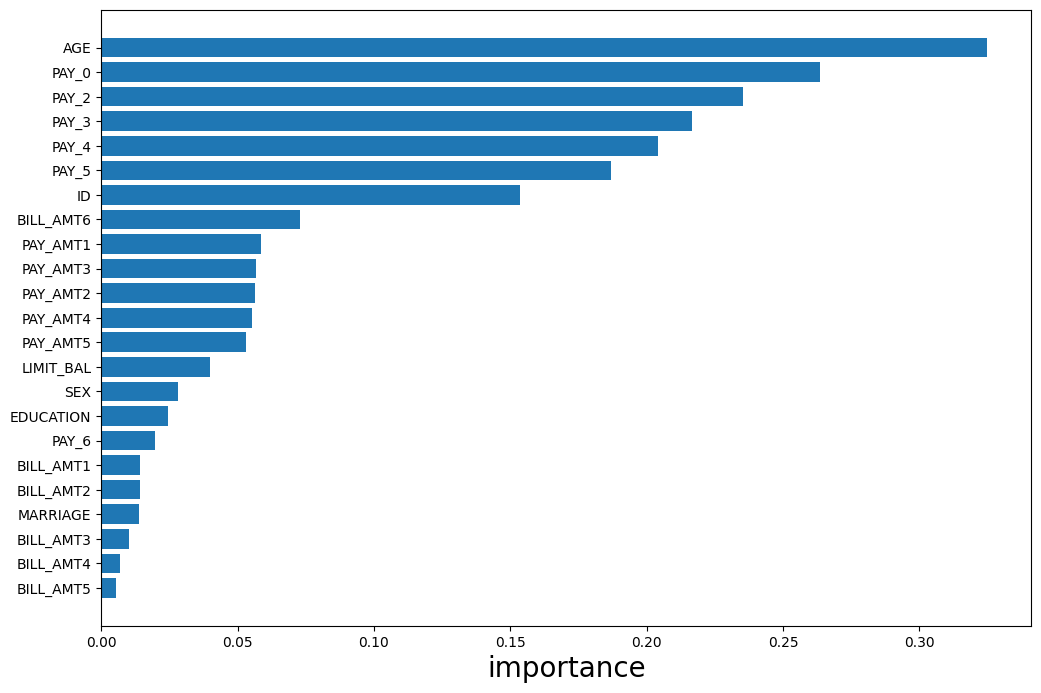

In [98]:
col_names = df.columns.values

# Sort features by correlation coefficients in order
# importances_sort = np.argsort(corrs)[::-1] # descending
importances_sort = np.argsort(corrs)# ascending

fig = plt.figure(figsize=(12,8))
plt.barh(range(X.shape[1]), corrs[importances_sort])
plt.xlabel('importance', fontsize=20)
plt.yticks(range(X.shape[1]), [col_names[i] for i in importances_sort])
plt.show();

#### *Вывод:* Видим на графике, что ```BILL_AMT4, BILL_AMT5, BILL_AMT6, MARRIAGE, BILL_AMT2, BILL_AMT1``` обладают наименьшей корреляцией Пирсона. Чтобы принять решение, какие признаки удалить из матрицы признаков, начнем удалять самый неважный и смотреть, как меняется качество модели. Для этой части исследования будем использовать логистическую регрессию и случайный лес для решения задачи классификации, чтобы посмотреть, как разные модели реагируют на отбор признаков. Качество модели будем оценивать по кросс-валидации.

In [68]:
features_counts = np.arange(X.shape[1])

In [99]:
def scores_by_cnt(clf):
    scores = []
    for features_part in tqdm(features_counts):
        X_part = X[:,importances_sort[features_part:]]
        scores.append(cross_val_score(clf, X_part, y, cv=5).mean())
    return scores

In [70]:
logreg_scores = scores_by_cnt(LogisticRegression(max_iter=1000))
rf_scores = scores_by_cnt(RandomForestClassifier(n_estimators=100, max_depth=3, n_jobs=-1))

  0%|          | 0/23 [00:00<?, ?it/s]C:\Users\HOME\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HOME\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HOME\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\HOME\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\u

#### Значения R^2 для обеих моделей посчитали, изобразим на графике.

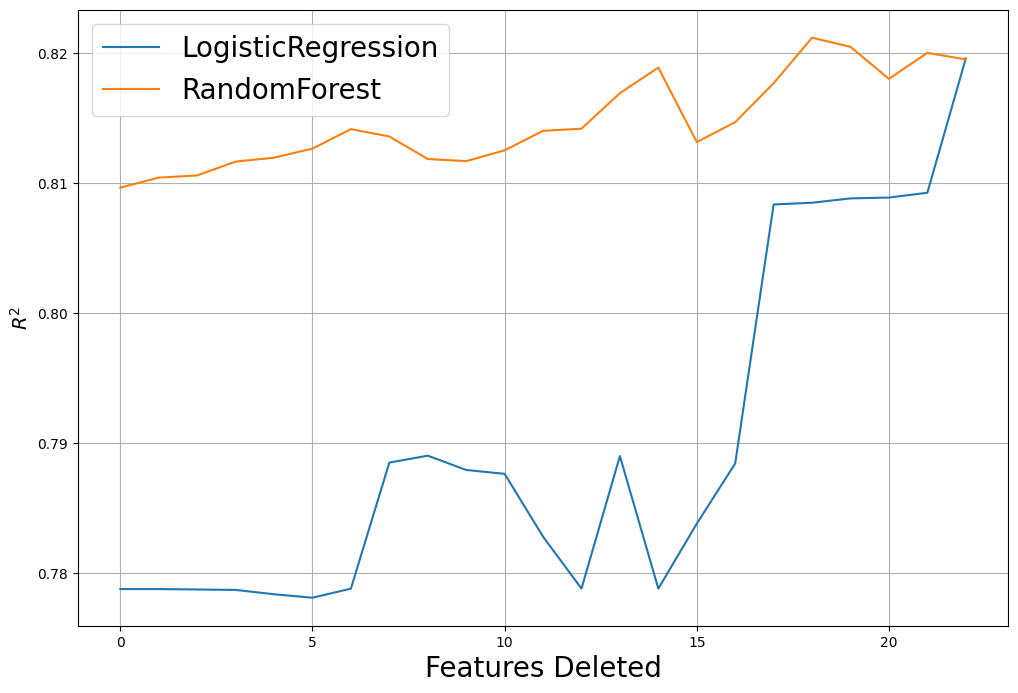

In [71]:
plt.figure(figsize=(12,8))

plt.plot(features_counts, logreg_scores, label='LogisticRegression')
plt.plot(features_counts, rf_scores, label='RandomForest')
plt.legend(loc='best', fontsize=20)
plt.xlabel('Features Deleted', fontsize=20)
plt.ylabel('$R^2$', fontsize=14)
plt.grid()

### *Вывод:* Видим, что в целом, лес обучается лучше, и при исключении 5-7 наихудших признаков, качество модели стабильно.

Попробуем для надежности отобрать признаки другим способом. Отбор по взаимной информации нам не подходит, так как у нас задача классификации. Будем использовать метод отбора признаков по модели. В качестве модели возьмем снова логрегрессию и случайный лес.

#### Отбор признаков по модели

In [100]:
Xx = df.drop(columns=['default.payment.next.month', 'ID'])
yy = df[['default.payment.next.month']]

In [103]:
def scores_by_cnt(clf):
    scores = []
    for features_part in tqdm(features_counts):
        X_part = X[:, importances_sort[features_part:]]
        X_part = X_part.reshape(X_part.shape[0], -1)  # Reshape to 2D
        scores.append(cross_val_score(clf, X_part, y, cv=5).mean())
    return scores

In [112]:
# Reshape X and y
X_reshaped = Xx.values.reshape(Xx.shape[0], -1)
y_reshaped = yy.values.reshape(-1)

In [113]:
# Select features using random forest
estimator = RandomForestClassifier(n_estimators=100, max_depth=3, n_jobs=-1)
selector = SelectFromModel(estimator)
selector = selector.fit(X_reshaped, y_reshaped)

# Get indices of selected features
selected_features_mask = selector.get_support()
selected_features_indices = np.where(selected_features_mask)[0]

# Create a new X array with only selected features
X_selected = X_reshaped[:, selected_features_indices]

# Compute cross-validation scores for each count of selected features
features_counts = np.arange(X_selected.shape[1])
rf_scores = []
for features_part in tqdm(features_counts):
    X_part = X_selected[:, :features_part+1]
    scores = cross_val_score(RandomForestClassifier(n_estimators=100, max_depth=3, n_jobs=-1), X_part, y_reshaped, cv=5)
    rf_scores.append(scores.mean())

100%|██████████| 6/6 [00:06<00:00,  1.14s/it]


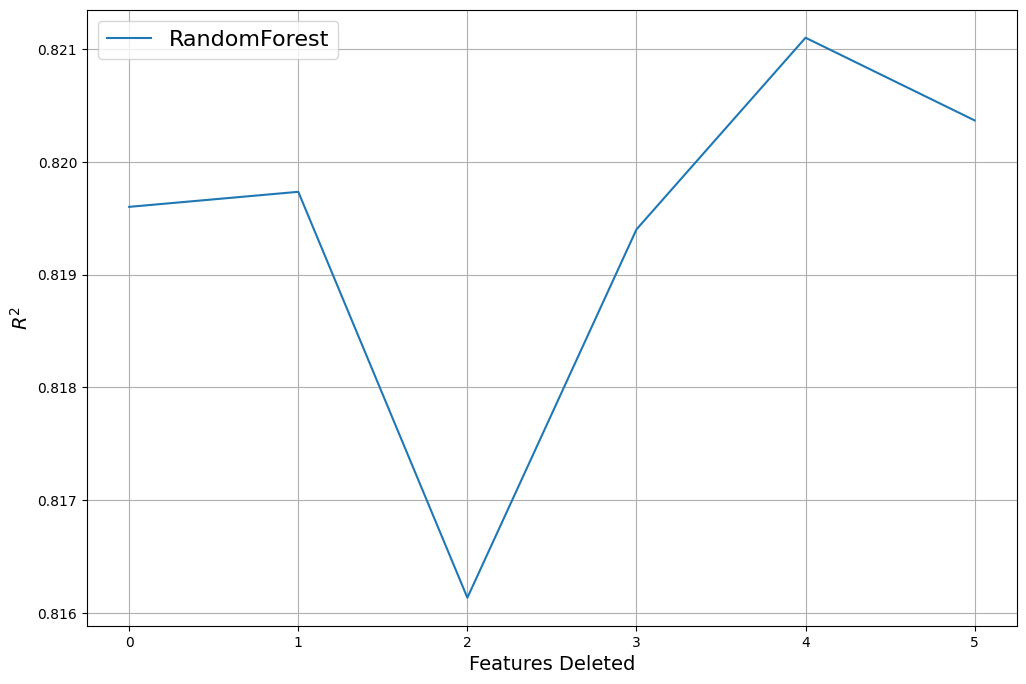

In [115]:
plt.figure(figsize=(12,8))

# plt.plot(features_counts, logreg_scores, label='LogisticRegression')
plt.plot(features_counts, rf_scores, label='RandomForest')
plt.legend(loc='best', fontsize=16)
plt.xlabel('Features Deleted', fontsize=14)
plt.ylabel('$R^2$', fontsize=14)
plt.grid()

#### *Вывод:* Один признак можно безопасно удалить без снижения качества модели.

In [117]:
data = df.drop(columns=['BILL_AMT5', 'ID']).copy()

Переходим к обучению моделей.

## 4) Модели

#### 4.1 Деление выборки на подвыборки

```- 75% train_data```
```- 25% test_data```

In [120]:
RANDOM_STATE = 1052023

In [121]:
train_data, test_data = train_test_split(data, test_size=0.25, random_state=RANDOM_STATE)

print('Размер обучающей выборки:', train_data.shape[0])
print('Размер тестовой выборки:', test_data.shape[0])

Размер обучающей выборки: 22500
Размер тестовой выборки: 7500


In [122]:
X_train = train_data.drop(['default.payment.next.month'], axis=1)
y_train = train_data['default.payment.next.month']

X_test = test_data.drop(['default.payment.next.month'], axis=1)
y_test = test_data['default.payment.next.month']

print('Обучающая выборка (признаки):', X_train.shape[0])
print('Обучающая выборка (таргет)', y_train.shape[0])
print()
print('Тестовая выборка (признаки):', X_test.shape[0])
print('Тестовая выборка (таргет)', y_test.shape[0])

Обучающая выборка (признаки): 22500
Обучающая выборка (таргет) 22500

Тестовая выборка (признаки): 7500
Тестовая выборка (таргет) 7500


#### 4.2 Масштабирование признаков

In [124]:
X_train_= X_train.copy()
X_test_ = X_test.copy()

scaler = MinMaxScaler()
X_train_ = scaler.fit_transform(X_train_)
X_test_ = scaler.transform(X_test_)

# вычисляем минимум и максимум по обучающим данным
scaler_train = MinMaxScaler().fit(X_train)
# вычисляем минимум и максимум по тестовым данным
scaler_test = MinMaxScaler().fit(X_test)

# масштабируем обучающие данные
X_train_scaled = scaler_train.transform(X_train)
# масштабируем тестовые данные и оцениваем качество на масштабированных данных
X_test_scaled = scaler_test.transform(X_test)

In [127]:
X_train_scaled = X_train_
X_test_scaled = X_test_

print(X_test_scaled[:5])

[[1.71717172e-01 1.00000000e+00 1.66666667e-01 6.66666667e-01
  1.55172414e-01 1.00000000e-01 1.00000000e-01 1.11111111e-01
  1.11111111e-01 1.11111111e-01 1.00000000e-01 1.38754105e-01
  6.63343165e-02 1.55701092e-01 1.60476871e-01 2.61047886e-01
  1.37370185e-04 4.88964878e-04 4.01767778e-04 7.24637681e-04
  0.00000000e+00 0.00000000e+00]
 [2.02020202e-02 1.00000000e+00 5.00000000e-01 3.33333333e-01
  2.75862069e-01 2.00000000e-01 2.00000000e-01 2.22222222e-01
  2.22222222e-01 2.22222222e-01 2.00000000e-01 1.61379707e-01
  9.13270090e-02 1.82534696e-01 1.87026769e-01 2.84135385e-01
  1.71712731e-03 1.22241219e-03 1.67403241e-03 2.09339775e-03
  2.81340776e-03 2.83733019e-03]
 [2.02020202e-02 1.00000000e+00 5.00000000e-01 3.33333333e-01
  3.10344828e-01 2.00000000e-01 2.00000000e-01 2.22222222e-01
  2.22222222e-01 2.22222222e-01 2.00000000e-01 1.65443186e-01
  9.48488576e-02 1.84727614e-01 1.86012250e-01 2.82198811e-01
  2.28950309e-03 1.33242929e-03 1.60483907e-03 1.28180354e-03
  1.

### *Вывод*: Данные готовы для обучения моделей: пропуски заполнены, признаки проверены на мультиколлинеарность, выделены подвыборки (трейн, тест), выделен целевой признак, категориальные данные закодированы, числовые признаки приведены к единому масштабу.

### 4.3 Decision Tree
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [128]:
%%time
# Initiating and building Decision Tree model
parameters_dt = {
    'max_depth': [2, 3, 4, 5],
    'splitter': ['best', 'random'],
    'criterion': ['gini', 'entropy', 'log_loss']
}

dt = DecisionTreeClassifier(random_state=RANDOM_STATE)
grid_DT = GridSearchCV(dt, param_grid=parameters_dt)
best_decision_tree_model = grid_DT.fit(X_train_scaled, y_train)
print('Наилучшие параметры для Decision Tree: {}'.format(best_decision_tree_model.best_params_))

Наилучшие параметры для Decision Tree: {'criterion': 'gini', 'max_depth': 3, 'splitter': 'best'}
CPU times: total: 4.78 s
Wall time: 5.48 s


### 4.4 Random Forest
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [129]:
%%time
# Initiating and building Random Forest Regressor model
parameters_rf = {
    'n_estimators': [5, 10, 20, 50],
    'max_depth': [2, 3, 7],
    'criterion': ['gini', 'entropy', 'log_loss'],
}

rf_model = RandomForestClassifier(random_state=RANDOM_STATE)
grid_RF = GridSearchCV(estimator=rf_model, param_grid=parameters_rf)
best_random_forest_model = grid_RF.fit(X_train_scaled, y_train)
print('Наилучшие параметры для Random Forest: {}'.format(best_random_forest_model.best_params_))

Наилучшие параметры для Random Forest: {'criterion': 'gini', 'max_depth': 7, 'n_estimators': 50}
CPU times: total: 51.8 s
Wall time: 1min 2s


### 4.5 Gradient Boosting

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

https://medium.com/all-things-ai/in-depth-parameter-tuning-for-gradient-boosting-3363992e9bae

In [130]:
%%time
param_grid={'n_estimators':[5,10],
            'learning_rate': [0.1,0.04,0.05,0.02],
            'max_depth':[4],
            'min_samples_leaf':[3],
            'max_features':[1.0] }
n_jobs=4

estimator = GradientBoostingClassifier(random_state=RANDOM_STATE)
gb_classifier = GridSearchCV(estimator=estimator,
                          cv=5,
                          param_grid=param_grid,
                          n_jobs=n_jobs)

best_gb_model = gb_classifier.fit(X_train_scaled, y_train)
print('Наилучшие параметры для Gradient Descent: {}'.format(best_gb_model.best_params_))

Наилучшие параметры для Gradient Descent: {'learning_rate': 0.1, 'max_depth': 4, 'max_features': 1.0, 'min_samples_leaf': 3, 'n_estimators': 10}
CPU times: total: 984 ms
Wall time: 12.2 s


In [132]:
print(best_gb_model.best_estimator_)

GradientBoostingClassifier(max_depth=4, max_features=1.0, min_samples_leaf=3,
                           n_estimators=10, random_state=1052023)


### 4.6 Сравнение качества моделей по кросс-валидации:

#### Decision Tree

In [133]:
best_score_dt = round(best_decision_tree_model.best_score_, 5)
print('Best score Decision Tree: {}'.format(best_score_dt))

Best score Decision Tree: 0.82027


In [134]:
train_predicted_dt = best_decision_tree_model.predict(X_train_scaled)
print("TRAIN Decision Tree Model, F1:", f1_score(y_train, train_predicted_dt))

TRAIN Decision Tree Model, F1: 0.480393425650317


In [135]:
train_predicted_dt = best_decision_tree_model.predict(X_train_scaled)
print("TRAIN Decision Tree Model, accuracy:", accuracy_score(y_train, train_predicted_dt))

TRAIN Decision Tree Model, accuracy: 0.8215555555555556


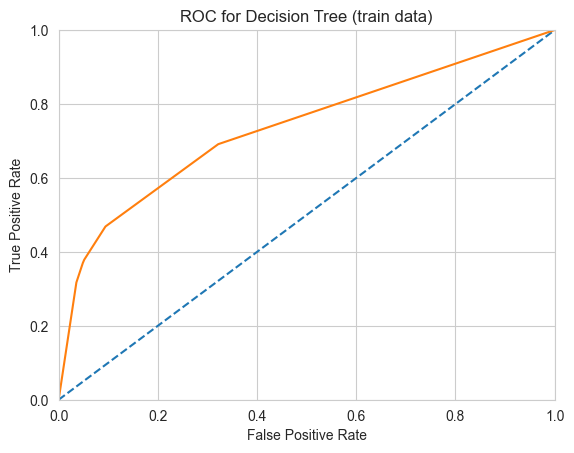

In [136]:
probabilities_train_dt = best_decision_tree_model.predict_proba(X_train_scaled)
probabilities_one_train_dt = probabilities_train_dt[:, 1]

fpr, tpr, thresholds = roc_curve(y_train, probabilities_one_train_dt)

plt.figure()

# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)

# < применим функции plt.xlim() и plt.ylim(), чтобы
#   установим границы осей от 0 до 1 >
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# < применим функции plt.xlabel() и plt.ylabel(), чтобы
#   подпишем оси "False Positive Rate" и "True Positive Rate" >
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# добавим к графику заголовок "ROC-кривая" функцией plt.title() >
plt.title('ROC for Decision Tree (train data)')
plt.show();

In [137]:
auc_roc_dt = roc_auc_score(y_train, probabilities_one_train_dt)
print(f'Decision Tree // model 1 AUC score: {auc_roc_dt}')

Decision Tree // model 1 AUC score: 0.7349373786319254


#### Random Forest

In [138]:
best_score_rf = round(best_random_forest_model.best_score_, 5)
print('Best score Random Forest: {}'.format(best_score_rf))

Best score Random Forest: 0.81938


In [141]:
train_predicted_rf = best_random_forest_model.predict(X_train_scaled)
print("TRAIN Random Forest Model, F1:", f1_score(y_train, train_predicted_rf))

TRAIN Random Forest Model, F1: 0.4959831423679704


In [142]:
train_predicted_rf = best_random_forest_model.predict(X_train_scaled)
print("TRAIN Random Forest Model, accuracy:", accuracy_score(y_train, train_predicted_rf))

TRAIN Random Forest Model, accuracy: 0.8299111111111112


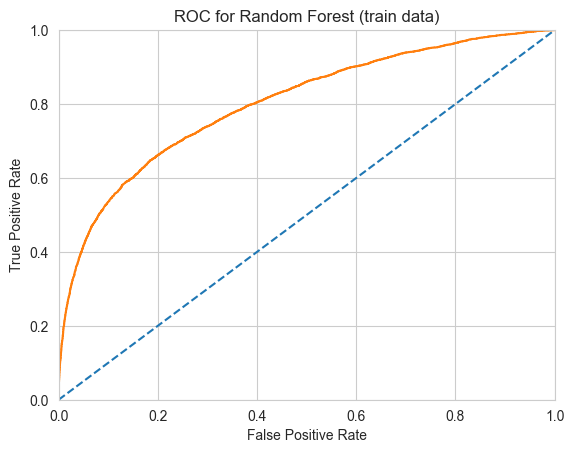

In [143]:
probabilities_train_rf = best_random_forest_model.predict_proba(X_train_scaled)
probabilities_one_train_rf = probabilities_train_rf[:, 1]

fpr, tpr, thresholds = roc_curve(y_train, probabilities_one_train_rf)

plt.figure()

# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)

# < применим функции plt.xlim() и plt.ylim(), чтобы
#   установим границы осей от 0 до 1 >
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# < применим функции plt.xlabel() и plt.ylabel(), чтобы
#   подпишем оси "False Positive Rate" и "True Positive Rate" >
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# добавим к графику заголовок "ROC-кривая" функцией plt.title() >
plt.title('ROC for Random Forest (train data)')
plt.show();

In [144]:
auc_roc_rf = roc_auc_score(y_train, probabilities_one_train_rf)
print(f'Random Forest // model 1 AUC score: {auc_roc_rf}')

Random Forest // model 1 AUC score: 0.8021718731481396


#### Gradient Boosting

In [145]:
best_score_gb = round(best_gb_model.best_score_, 5)
print('Best score Gradient Boosting: {}'.format(best_score_gb))

Best score Gradient Boosting: 0.81858


In [146]:
train_predicted_gb = best_gb_model.predict(X_train_scaled)
print("TRAIN Random Forest Model, F1:", f1_score(y_train, train_predicted_rf))

TRAIN Random Forest Model, F1: 0.4959831423679704


In [147]:
train_predicted_gb = best_gb_model.predict(X_train_scaled)
print("TRAIN Gradient Boosting Model, accuracy:", accuracy_score(y_train, train_predicted_gb))

TRAIN Gradient Boosting Model, accuracy: 0.8213333333333334


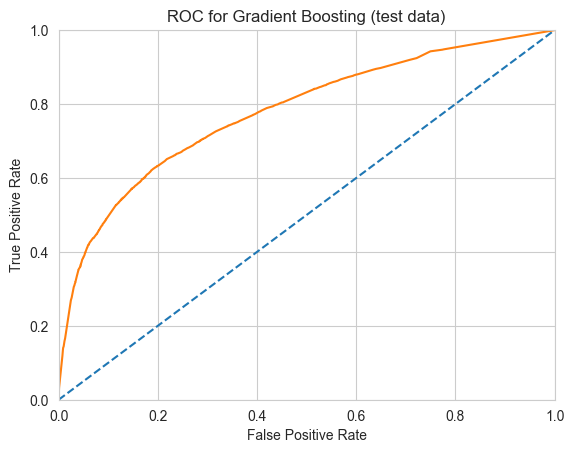

In [148]:
probabilities_train_gb = best_gb_model.predict_proba(X_train_scaled)
probabilities_one_train_gb = probabilities_train_gb[:, 1]

fpr, tpr, thresholds = roc_curve(y_train, probabilities_one_train_gb)

plt.figure()

# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)

# < применим функции plt.xlim() и plt.ylim(), чтобы
#   установим границы осей от 0 до 1 >
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# < применим функции plt.xlabel() и plt.ylabel(), чтобы
#   подпишем оси "False Positive Rate" и "True Positive Rate" >
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# добавим к графику заголовок "ROC-кривая" функцией plt.title() >
plt.title('ROC for Gradient Boosting (test data)')
plt.show();

In [149]:
auc_roc_gb = roc_auc_score(y_train, probabilities_one_train_gb)
print(f'Gradient Boosting // model 1 AUC score: {auc_roc_gb}')

Gradient Boosting // model 1 AUC score: 0.7786982504763554


### *Вывод*: Наивысший скор по кросс-валидации получил Random Forest.

## 5 Тестируем лучшую модель (Random Forest) на тестовой выборке и делаем тестовые предсказания

### 5.1 Тестирование модели

In [150]:
test_predicted_rf = best_random_forest_model.predict(X_test_scaled)
print("TEST RF Model, F1:", f1_score(y_test, test_predicted_rf))

TEST RF Model, F1: 0.4562830418869459


In [151]:
test_predicted_rf = best_random_forest_model.predict(X_test_scaled)
print("TRAIN RF Model, accuracy:", accuracy_score(y_test, test_predicted_rf))

TRAIN RF Model, accuracy: 0.8217333333333333


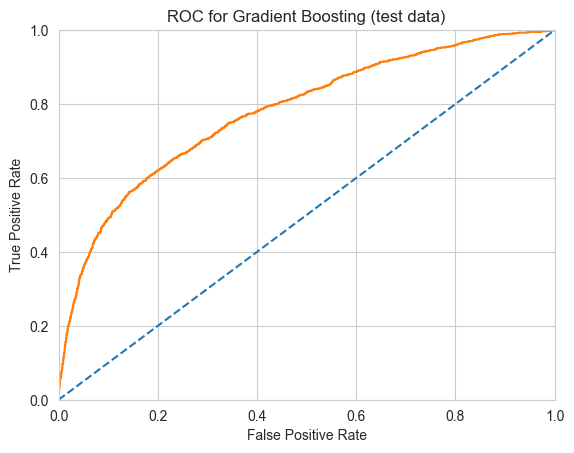

In [152]:
probabilities_test_rf = best_random_forest_model.predict_proba(X_test_scaled)
probabilities_one_test_rf = probabilities_test_rf[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, probabilities_one_test_rf)

plt.figure()

# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.plot(fpr, tpr)

# < применим функции plt.xlim() и plt.ylim(), чтобы
#   установим границы осей от 0 до 1 >
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# < применим функции plt.xlabel() и plt.ylabel(), чтобы
#   подпишем оси "False Positive Rate" и "True Positive Rate" >
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

# добавим к графику заголовок "ROC-кривая" функцией plt.title() >
plt.title('ROC for Gradient Boosting (test data)')
plt.show();

In [153]:
auc_roc_rf = roc_auc_score(y_test, probabilities_one_test_rf)
print(f'Gradient Boosting // model 1 AUC score: {auc_roc_rf}')

Gradient Boosting // model 1 AUC score: 0.7788597812661959


### *Вывод*: Модель случайного леса показала наилучший результат. Модель слегка переобучается: на обучающей выборке AUC-ROC=0.802, на тестовой подвыборке AUC-ROC=0.779. Такие значения говорят о том, что модель не переобучена и может быть рекомендована клиенту для использования в бизнесе.

### 5.2 Предсказания

In [154]:
# Random Forest
y_pred_rf = best_random_forest_model.predict(X_test_scaled)
y_pred_rf

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [157]:
test_pred = X_test.copy()

In [158]:
test_pred['default.payment.next.month'] = best_random_forest_model.predict(X_test_scaled)

In [159]:
test_pred['predictions'] = np.round(best_random_forest_model.predict_proba(X_test_scaled),3)[:, 1]
test_pred.shape

(7500, 24)

In [160]:
test_pred_df = pd.DataFrame(test_pred)
test_pred_df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month,predictions
22284,180000.0,2,1,2,30,-1,-1,-1,-1,-1,...,360.0,90.0,120.0,600.0,360.0,450.0,0.0,0.0,0,0.225
20100,30000.0,2,3,1,37,0,0,0,0,0,...,28545.0,30133.0,1500.0,1500.0,1500.0,1300.0,1200.0,1500.0,0,0.158
28870,30000.0,2,3,1,39,0,0,0,0,0,...,27468.0,27613.0,2000.0,1635.0,1438.0,796.0,5000.0,1000.0,0,0.142
12051,50000.0,2,2,1,26,1,2,2,2,2,...,20455.0,21747.0,1500.0,1000.0,2500.0,0.0,2100.0,0.0,1,0.561
25199,30000.0,2,2,2,24,1,-1,-1,-2,-2,...,-25.0,6685.0,570.0,25.0,0.0,4922.0,6788.0,0.0,0,0.207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1381,30000.0,1,1,1,52,0,0,0,2,0,...,18395.0,20582.0,1300.0,2500.0,0.0,1000.0,1800.0,0.0,0,0.253
27714,130000.0,2,2,2,23,0,0,0,0,0,...,37851.0,39849.0,6000.0,6000.0,4000.0,10000.0,5000.0,8002.0,0,0.101
12492,20000.0,2,3,1,33,0,0,0,0,0,...,3802.0,3152.0,1224.0,1197.0,269.0,269.0,261.0,227.0,0,0.209
12899,140000.0,2,1,2,28,-1,-1,-1,-1,-2,...,-18.0,-18.0,9532.0,33788.0,0.0,0.0,0.0,0.0,0,0.130


In [161]:
# test_pred_df.to_csv("C:\\Users\\HOME\\PycharmProjects\\case_studies_da\\4. UCI_Credit_Card\\test_pred_df.csv")

### 5.3 Изучим, насколько хорошо модель классифицирует целевое значение

In [162]:
print(classification_report(y_test, best_random_forest_model.predict(X_test_scaled)))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      5884
           1       0.67      0.35      0.46      1616

    accuracy                           0.82      7500
   macro avg       0.75      0.65      0.67      7500
weighted avg       0.80      0.82      0.80      7500



## *Отчет*

#### Было построено несколько моделей машинного обучения - дерево решений, случайный лес и градиентный бустинг. Для подбора метрик использовался поиск по сетке, в результате которого наивысшую оценку получила модель случайного леса со следующими параметрами:

```{'criterion': 'gini', 'max_depth': 7, 'n_estimators': 50}```

#### В качестве финального решения клиенту были предложены предсказания в формате бинарной переменной (0 или 1) и вероятности того, что клиент расторгнет контракт. Также были представлены признаки, которые наиболее всего влияют на предсказания модели.